# 2 Dice Rolling

## 1. Background
- Use dices with 1~6
- Roll 2 dices and add 2 numbers

## 2. Rules
- Assume minimal neighborhood transition with equal transition probability
- Markov matrix as below  

||2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|2|0.5|0.5|   |   |   |   |   |   |   |   |   |
|3|0.5|   |0.5|   |   |   |   |   |   |   |   |
|4|   |0.5|   |0.5|   |   |   |   |   |   |   |
|5|   |   |0.5|   |0.5|   |   |   |   |   |   |
|6|   |   |   |0.5|   |0.5|   |   |   |   |   |
|7|   |   |   |   |0.5|   |0.5|   |   |   |   |
|8|   |   |   |   |   |0.5|   |0.5|   |   |   |
|9|   |   |   |   |   |   |0.5|   |0.5|   |   |
|10|   |   |   |   |   |   |   |0.5|   |0.5|   |
|11|   |   |   |   |   |   |   |   |0.5|   |0.5|
|12|   |   |   |   |   |   |   |   |   |0.5|0.5|

In [1]:
import collections

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
states = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
cases = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])
records = np.array([states])
trials = 20000

for i in range(trials):
    current_state = records[-1, :]
    # transition
    transition = 2*np.array(np.random.sample(len(states)) < 0.5, dtype=np.int)-1
    next_state = current_state + transition
    next_state[next_state < 2] = 2
    next_state[next_state > 12] = 12
    # move
    move = np.random.sample(len(states)) < np.minimum(1, cases[next_state-2]/cases[current_state-2])
    records = np.vstack((records, current_state*(1-move) + next_state*move))

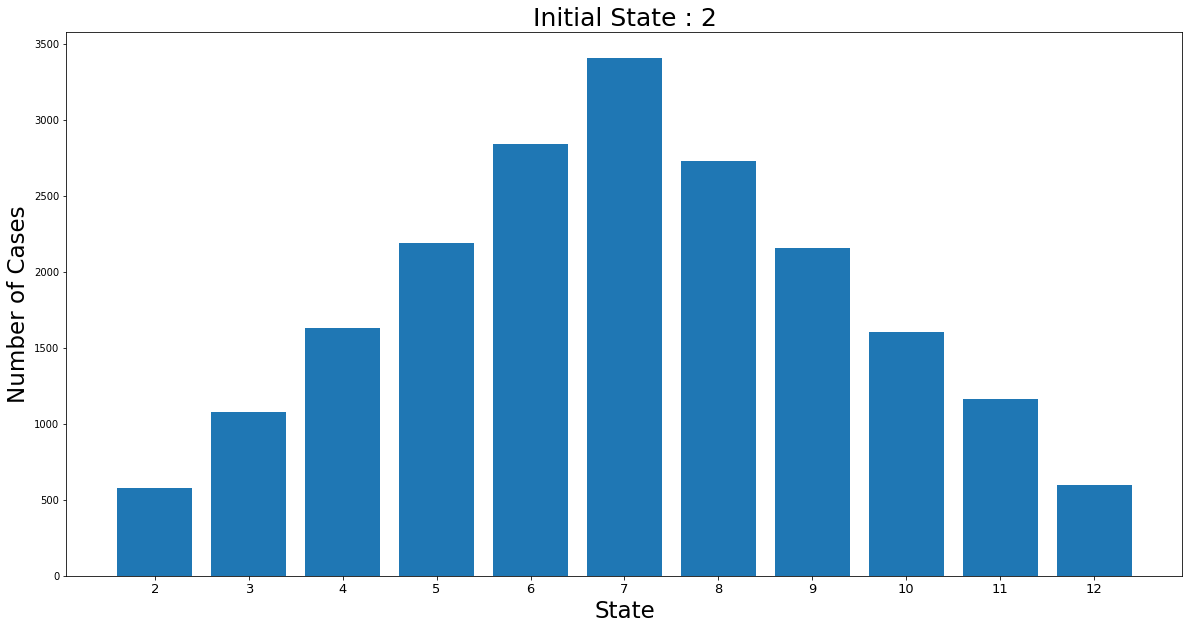

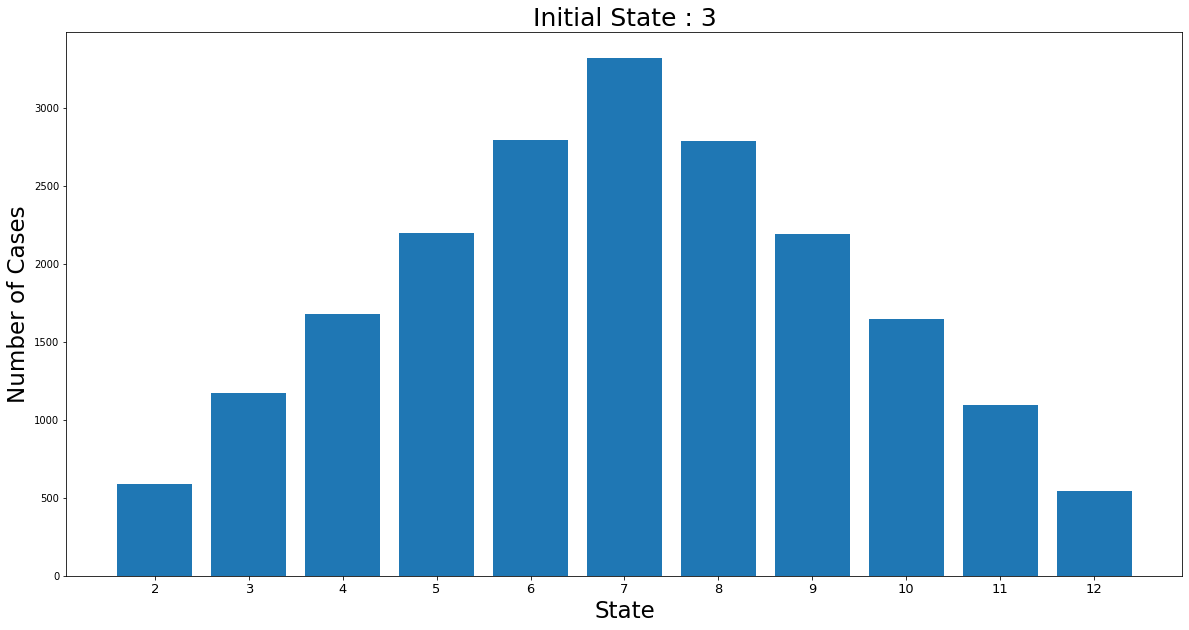

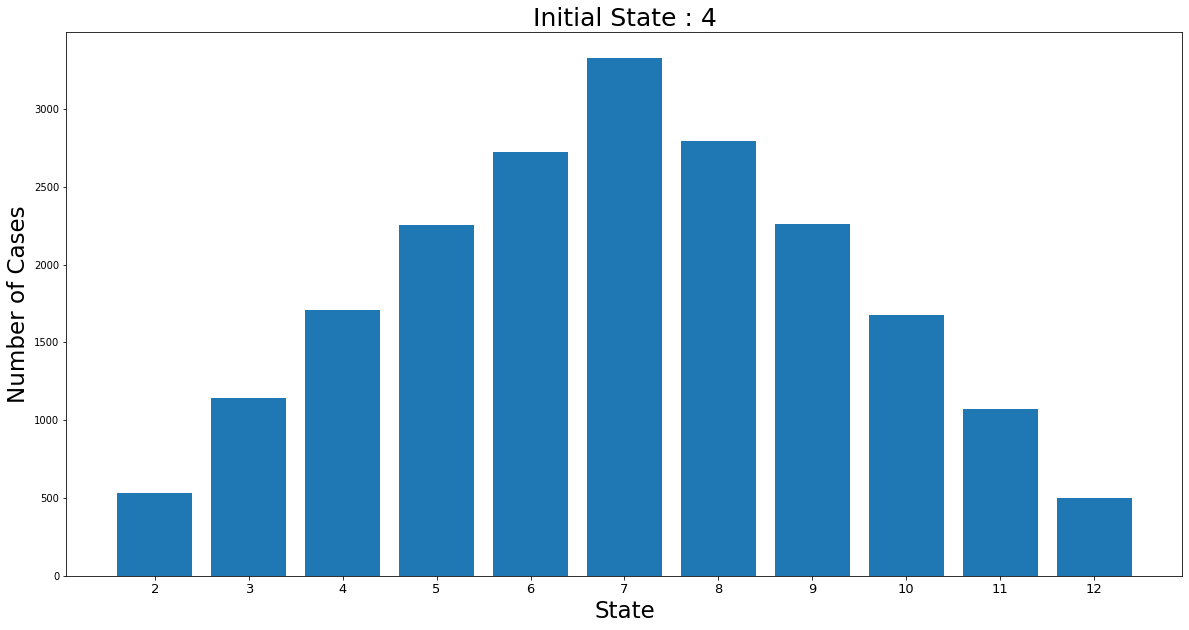

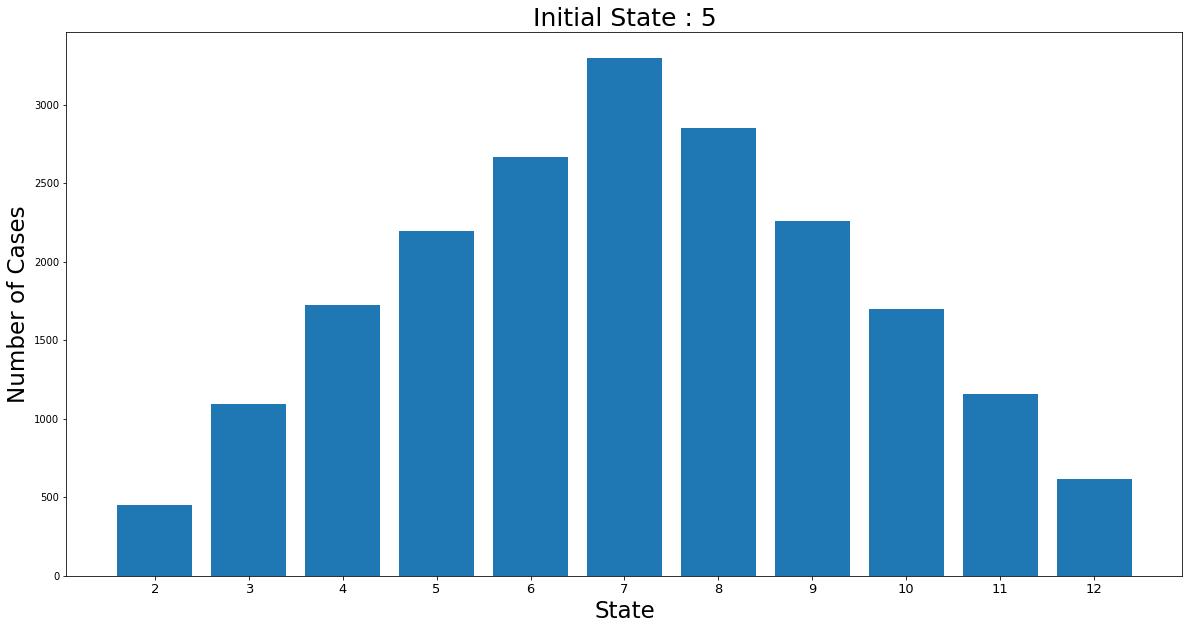

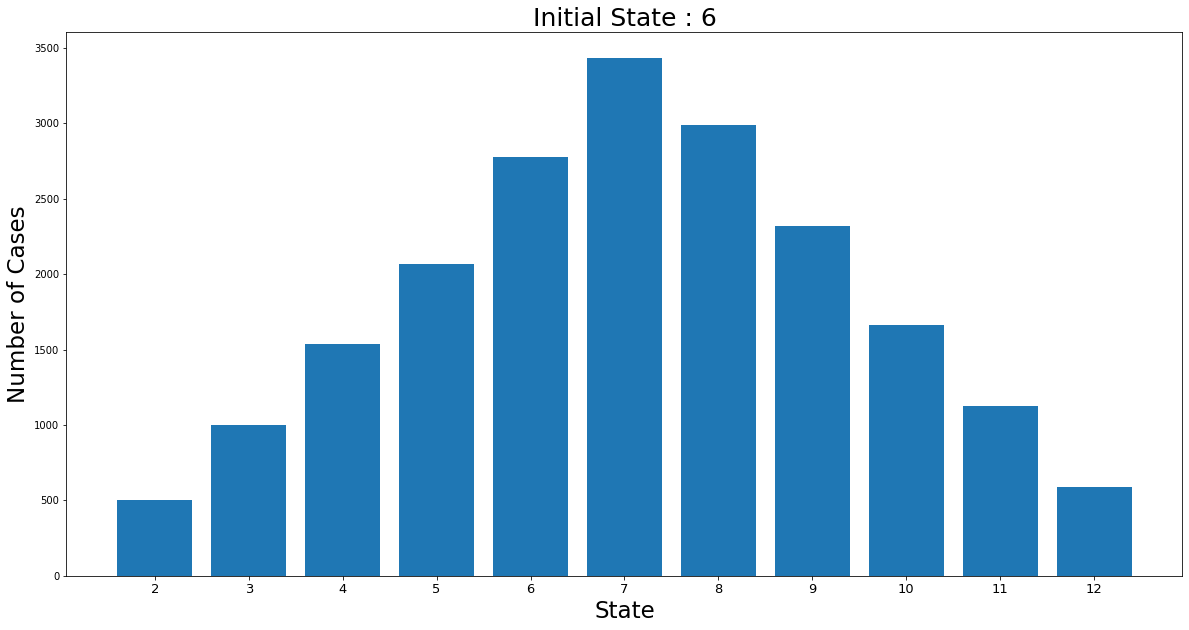

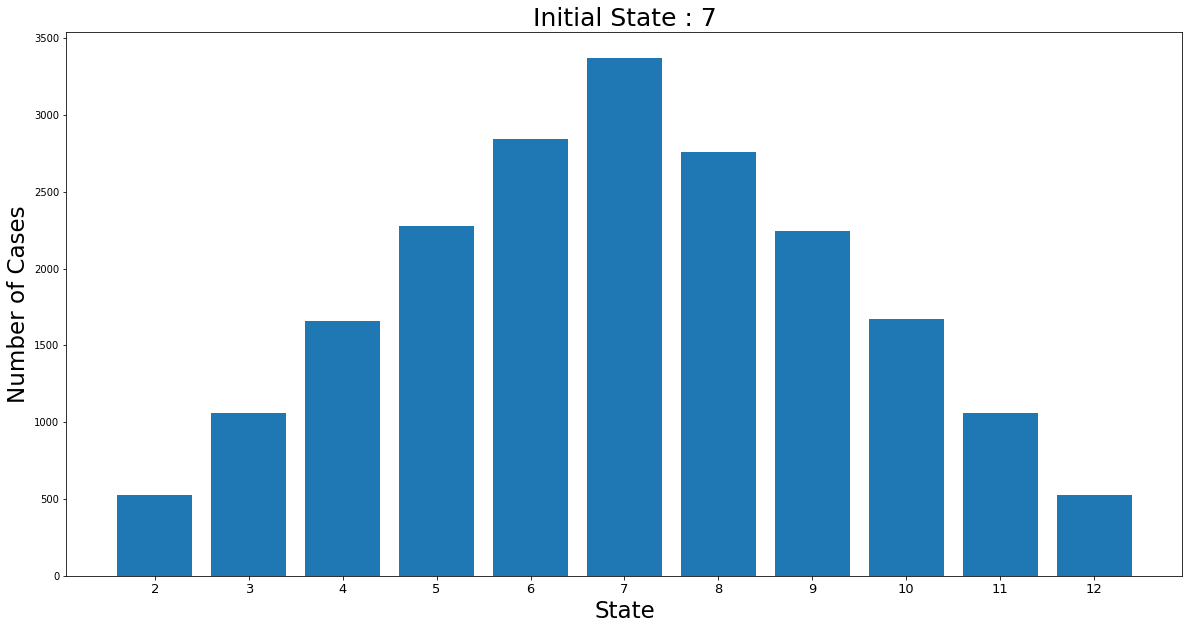

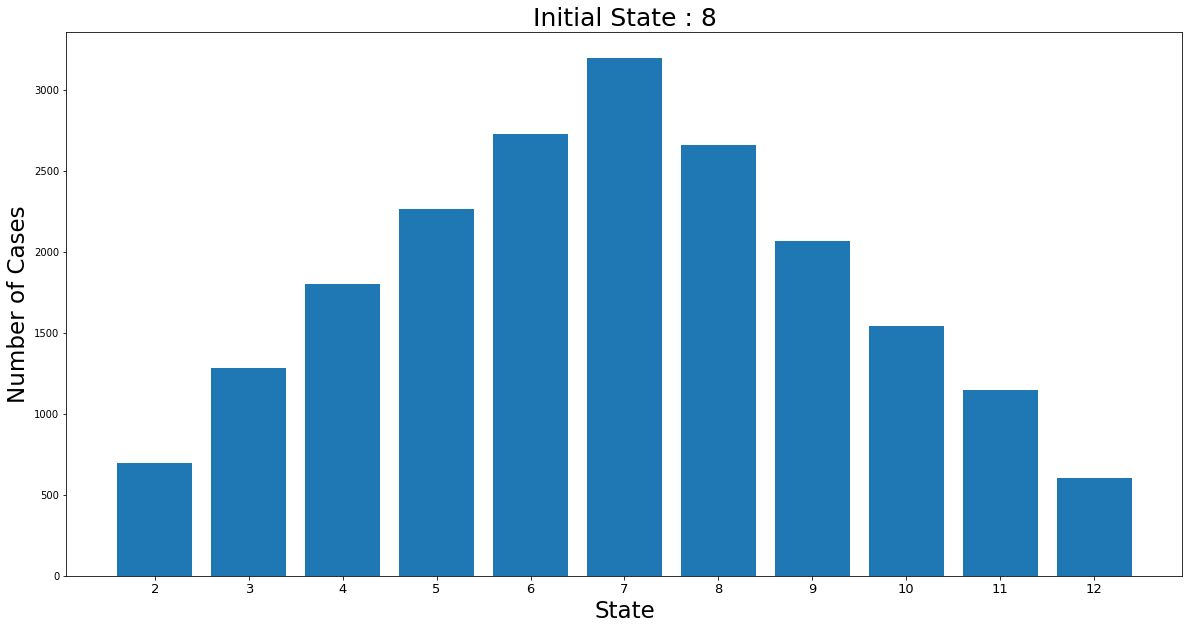

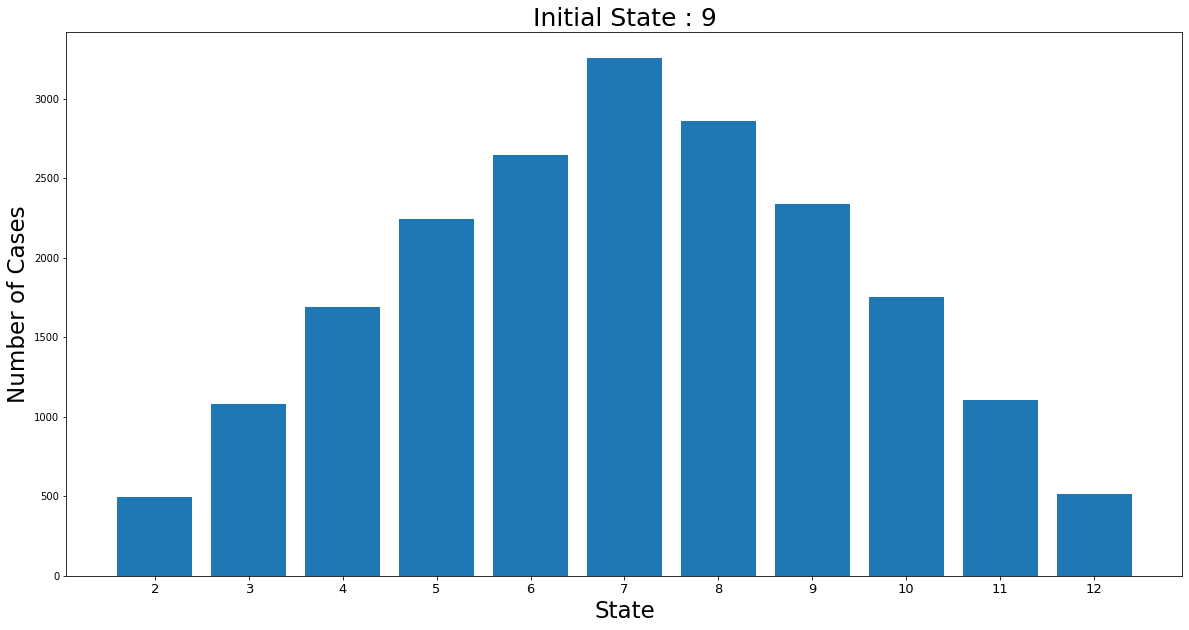

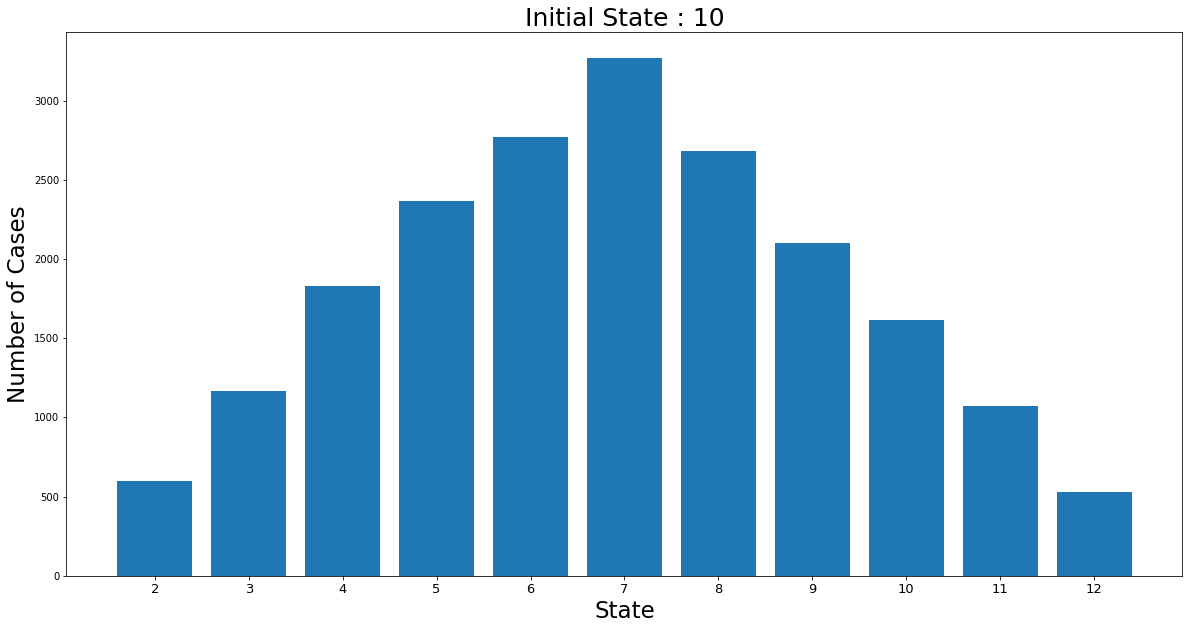

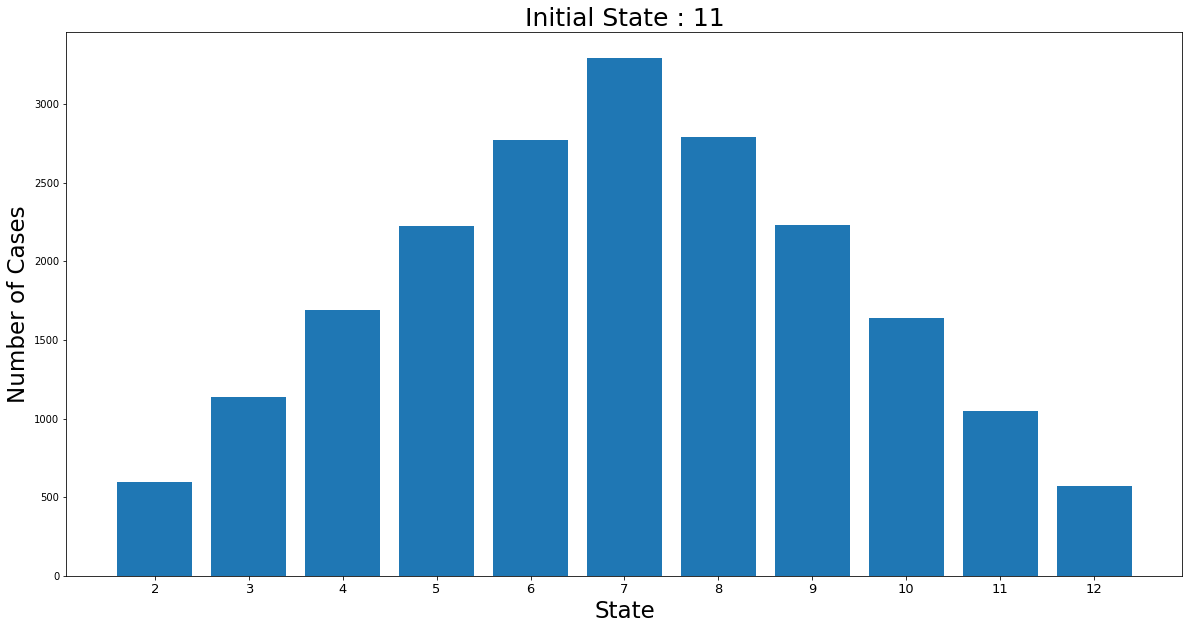

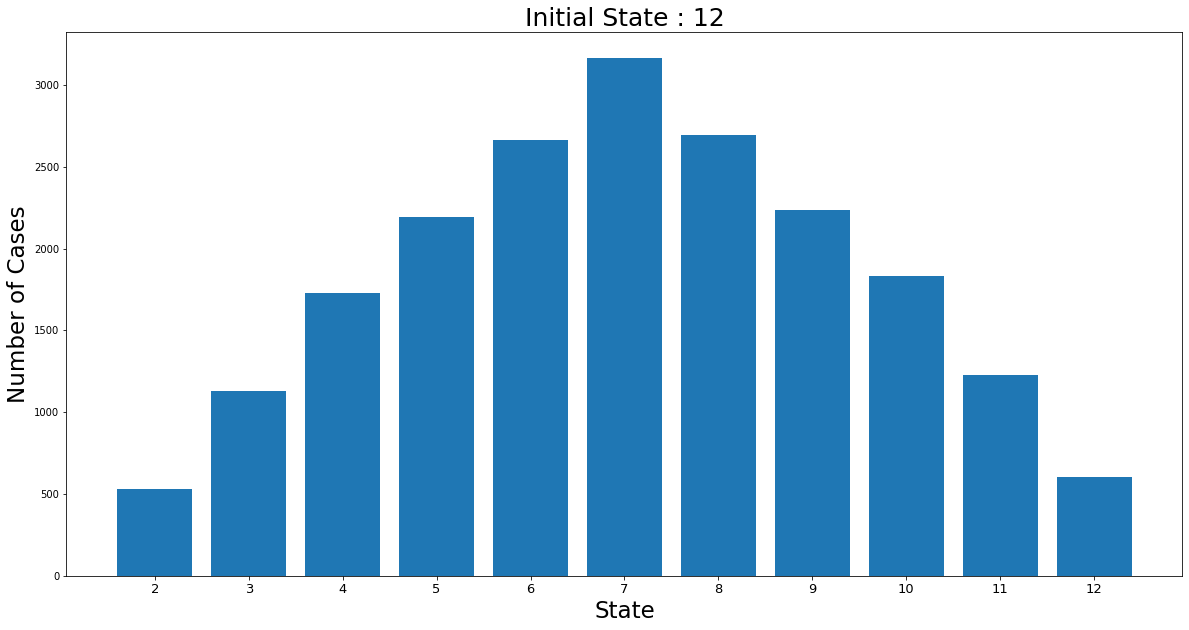

In [3]:
title_fontsize, label_fontsize, tick_fontsize = 25, 23, 13

for i, state in enumerate(states):
    plt.figure(figsize=(20, 10))
    x, y = list(), list()
    for a, b in sorted(collections.Counter(records[1:, i]).items(), key=lambda x: x[0]):
        x.append(a)
        y.append(b)
    plt.bar(x, y)
    plt.title('Initial State : ' + str(state), fontsize=title_fontsize)
    plt.xlabel('State', fontsize=label_fontsize)
    plt.ylabel('Number of Cases', fontsize=label_fontsize)
    plt.xticks(states, fontsize=tick_fontsize)
plt.show()